## Aprendizagem de máquina

### Objetivos

  - Avaliar os conceitos de aprendizado de maquina aprendidos no curso


# Desafio

Você foi contratado por uma empresa inovadora do ramo imobiliario como `QuintoAndar, Loft, Terraz, grupo Zap (ZAP, Viva Real, DataZAP, FipeZAP, SuaHouse, Geoimóvel, Sub100 e Conecta Imobi) ou Imobi Conference`. O seu desafio está no apio à tomada de decisão baseada em dados (empresa data driven). 

Nesse sentido, use a base de dados **aptos.csv** para realizar a descoberta do conhecimento e responder a pergunta: 

**`Quanto vale um apartamento de 65m2 com 2 quartos, 2 vagas, reformado no Centro?`**


### Orientações

Siga as instruções, completando e construindo os algoritmos necessários.

Nas celulas` Seu Código aqui...` significa que é necessário realizar a implementação de algum código. Utilize quantos blocos(células) julgar necessário para criar o código.

Nas celulas `Responda` significa que é nessário uma resposta clara e objetiva (pode ser por texto, código, gráfico, imagem...) para a pergunta.

## Rubrica para avaliação
    
Os critérios de avaliação do projeto segue conforme a rubrica.

- R1: Exploração de Dados (Até 2 pontos)
- R2: Análise Descritiva de Dados (Até 2 pontos)
- R3: Desenvolvimento do Modelo (Até 2 pontos)
- R4: Treinamento e Teste do Modelo (Até 2 pontos)
- R5: Conclusões Finais (Até 2 pontos)

**Nota_final = R1 + R2 + R3 + R4 + R5**

# 1. Exploração de Dados

Carregue o dataset e faça uma inspeção nas 15 primeiras linhas para identificação básica dos atributos.


In [21]:
# Inicializção das bibliotecas
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [22]:
#Seu Código aqui....

#Carregando base de dados
df = pd.read_csv('aptos.csv')

#Verificando informações sobre o dataset
df.info()
#Verificando se o dataset foi carregado com êxito
df.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   metros     100 non-null    int64 
 1   valor      100 non-null    int64 
 2   quartos    100 non-null    int64 
 3   vagas      100 non-null    int64 
 4   reformado  100 non-null    int64 
 5   bairro     100 non-null    object
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


,metros,valor,quartos,vagas,reformado,bairro
0,107,560,3,2,0,Vila Lusitania
1,107,555,3,2,1,Vila Lusitania
2,49,196,2,1,0,Ferrazopolis
3,104,515,3,2,1,Centro
4,92,560,3,2,1,Vila Lusitania
5,51,249,2,1,0,Taboao
6,140,635,4,3,1,Centro
7,50,210,2,1,1,Demarchi
8,93,450,3,2,0,Baeta Neves
9,107,425,3,2,1,Rudge Ramos


In [23]:
#Analisando quantidades de linhas e colunas do dataset
df.shape

(100, 6)

In [24]:
#Analisando informações matemáticas do dataset
df.describe()

,metros,valor,quartos,vagas,reformado
count,100.000000,100.00000,100.000000,100.000000,100.000000
mean,80.280000,402.93000,2.590000,1.650000,0.540000
std,27.606206,171.43154,0.552222,0.687184,0.500908
min,43.000000,188.00000,2.000000,0.000000,0.000000
25%,56.750000,258.00000,2.000000,1.000000,0.000000
50%,72.000000,355.00000,3.000000,2.000000,1.000000
75%,100.000000,515.00000,3.000000,2.000000,1.000000
max,199.000000,880.00000,4.000000,4.000000,1.000000


### `Pergunta:` Apresente uma breve descrição do significado de cada atributo:

Exemplo:
- Idade: Idade em anos da pessoa
- Marca: fabricante de carros
- Combustivel: tipo de combustível (gasolina, disel...)
- Especie: Tipo de flor iris-setosa, virginica... (Variável Alvo)






**Resposta:**

-   **metros:**    Tamanho em metros quadrado do imovel

-   **valor:**     Valor em reais por m2(metro quadrado) do imóvel

-   **quartos:**   Quantidade de quartos por imóvel 

-   **vagas:**     Quantidade de vagas por 

-   **reformado**: Atributo para identificar se o imóvel esta reformado ou não, sendo 1 para reformado e 0 para não-reformado

-   **bairro:**    Local do imóvel


**Pergunta:** Cite 2 cenários que podem fazer sentido na leitura dos dados apresentados.

Exemplo: 
- Eu acho que o preço da gasolina sobe com o preço do petróleo. 
- Eu acho que na média homens são mais altos que mulheres na mesma faixa etaria.  

**Resposta:**

1. - Analisando rapidamente o dataset, percebemos que de acordo com a região(bairro) o preço do metro quadrado pode ou não aumentar

2.  - Podemos dizer que a média de metros quadrados é de 80 e que o valor médio de um apartamento com 80 metros quadrados é de 402 mil aproximadamente

## 2. Análise descritiva de dados

Faça uma análise exploratória dos dados. Utilize-se de gráficos e tabelas auxiliares, faça correlações entre os atributos.... Com o objetivo validar as afirmações levantadas acima.

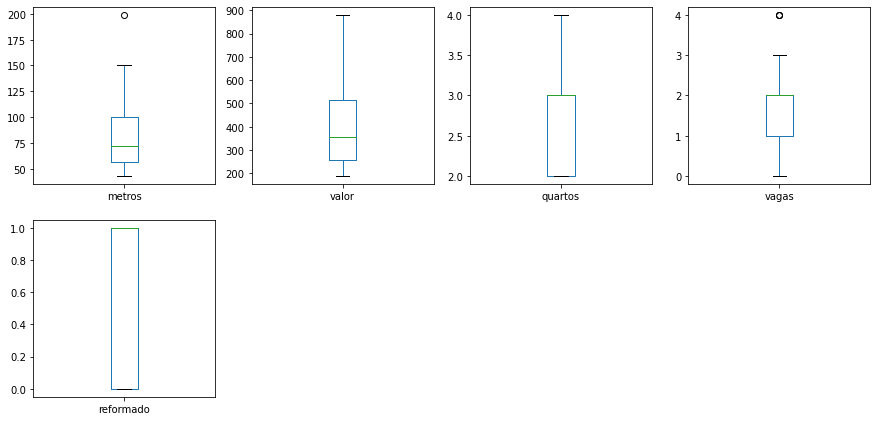

In [25]:
#Seu Código aqui...

#Gráfico do tipo boxplot podemos identificar várias informações, como média, Outliers entre outras.
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(15, 15))
plt.show()

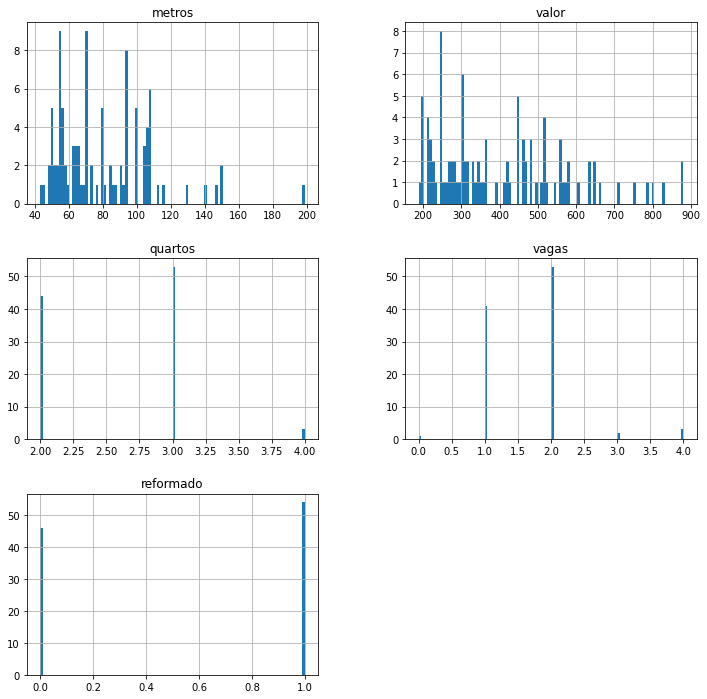

In [26]:
#Histogramas são bons para mostrar as frequencia dos dados e analisar os cenários encontrados
df.hist(bins=100, figsize=(12, 12))
plt.show()

<AxesSubplot:>

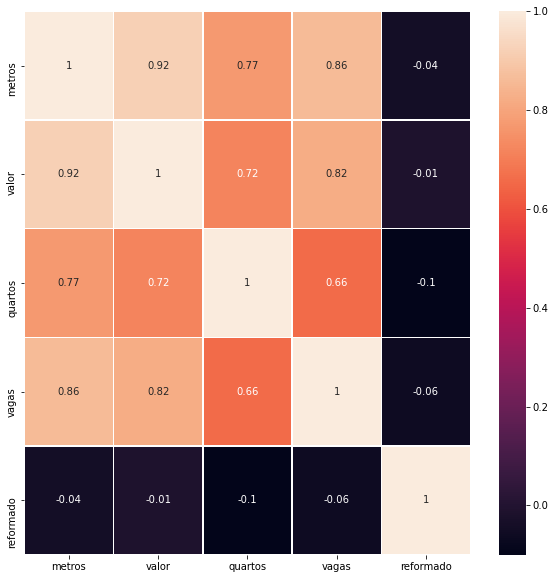

In [27]:
#Seu Código aqui...

#Vamos explorar um pouco uma matrix de correlação dos dados

import seaborn as sns 
correlation_matrix = df.corr().round(2)

fig, ax = plt.subplots(figsize=(10,10))    
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)


In [28]:
'''
Qual é o target do projeto?
R: Valor

Qual é a feature que possue maior relação positiva com o target?
R: Metros

Qual é a feature que possue maior relação negativa com o target?
R: Reformado

'''

'\nQual é o target do projeto?\nR: Valor\n\nQual é a feature que possue maior relação positiva com o target?\nR: Metros\n\nQual é a feature que possue maior relação negativa com o target?\nR: Reformado\n\n'

<AxesSubplot:xlabel='metros', ylabel='valor'>

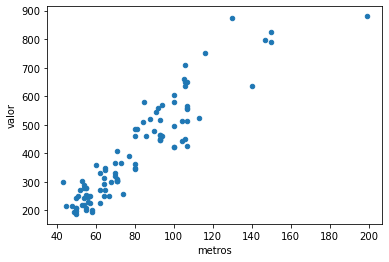

In [29]:
df.plot.scatter('metros', 'valor')

<AxesSubplot:xlabel='valor', ylabel='reformado'>

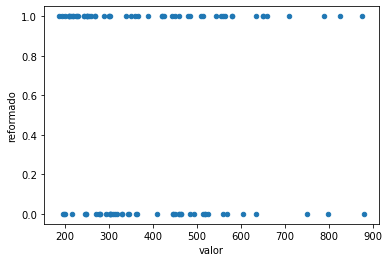

In [30]:
df.plot.scatter('valor', 'reformado')

### __(BONUS: 1 ponto extra.)__ Análise de Outliers
*Esse é um ponto extra, faça se quiser...

Realize a análise e o tratamento de **outliers**, como referência para estudo:

* [link1](https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/)
* [link2](https://towardsdatascience.com/4-machine-learning-techniques-for-outlier-detection-in-python-21e9cfacb81d)
* [link3](https://minerandodados.com.br/tratando-outliers-python/)

**Pergunta:** Foram localizados outliers? Qual o método de análise adotado? Se existe, como os dados foram tratados (foram removidos ou mantidos)? 

In [31]:
'''
Foram localizados outliers?
R:Sim.

Qual o método de análise adotado?
R:Método boxplot para identificar dados fora do padrão. Ao analisar a distrubuição dos dados de metros, vagas e valor foi identificado outliers.
Esses outliers representam a venda de um imóvel de alto nível.


Como os dados foram tratados(foram removidos ou mantidos)?
R:Os outliers foram mantidos pois caso as informações fossem exlucídas, dados de vendas seriam perdidos.
'''

'\nForam localizados outliers?\nR:Sim.\n\nQual o método de análise adotado?\nR:Método boxplot para identificar dados fora do padrão. Ao analisar a distrubuição dos dados de metros, vagas e valor foi identificado outliers.\nEsses outliers representam a venda de um imóvel de alto nível.\n\n\nComo os dados foram tratados(foram removidos ou mantidos)?\nR:Os outliers foram mantidos pois caso as informações fossem exlucídas, dados de vendas seriam perdidos.\n'

## 3. Desenvolvimento do Modelo

**Pergunta:** O conjunto de dados indica a aplicação de qual modelo de aprendizagem de maquina para determinação do valor de um imóvel? Por que ? 

**Resposta:**

    [ ] Aprendizado por reforço
    [X] Aprendizado supervisionado
    [ ] Aprendizado não supervisionado

**Pergunta:** Qual a técnica sugerida para este projeto?

**Resposta:**

    [X] Regressão
    [ ] Classificação
    [ ] Clusterização

**Pergunta:** Escolha 2 modelos de algoritmos para testar a performance de cada um deles.

**Resposta:**

1. algoritimo **RandomForest**  
2. algoritimo **LinearRegression**

__(BONUS: 1 ponto extra.)__ **Pergunta:** Explique como cada algoritmo funciona.


**Resposta:**

1. algoritimo RandomForest: Analisa um conjunto de árvores de decisão para encontrar qual o melhor caminho a se seguir com base em probabilidades encontradas em um conjunto de dados, onde os "nós" das árvores são criados a partir das features do modelo para dar suporte a tomada de decisão ao prever o valor da variável target.


2. algoritimo LinearRegression: Utilizado para prever/estimar o melhor "peso" valor de uma target, de acordo os valores observados anteriormente e analisando suas correlações de independências.

## 4. Treinamento e teste do modelo

Crie um subset dos dados apenas com os atributos que serão utilizados para o treinameno e teste do modelo. Divida o subset em conjunto de treinamento e teste.

In [32]:
#Seu Código aqui...

# Vamos treinar nosso modelo com 2 dois atributos independentes
# X é para predizer o valor de saida ou sejas as variáveis que correlacionam com nosso target
X = df[['metros', 'reformado']]
#Y é nossa variavél target
Y = df['valor']
print(f"Formato das tabelas de dados {X.shape} e saidas {Y.shape}")

Formato das tabelas de dados (100, 2) e saidas (100,)


In [33]:
# Separamos 40% para o teste
from sklearn.model_selection import train_test_split

X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.4)

print(X_treino.shape)
print(X_teste.shape)
print(Y_treino.shape)
print(Y_teste.shape)

(60, 2)
(40, 2)
(60,)
(40,)


In [34]:
#Verificando dataset de treino
X_treino.head()

,metros,reformado
5,51,0
4,92,1
25,62,0
2,49,0
42,64,0


In [35]:
Y_treino.head()

5     249
4     560
25    330
2     196
42    315
Name: valor, dtype: int64

Faça o treinamento e teste dos 2 algoritmos escolhidos. Utilize uma métrica (ex. R2-score, RMSE e MAE...) para avaliar a performance dos modelos.

### Algoritmo 1

In [36]:
#Seu Código aqui...

#LinearRegression
# Importa a biblioteca
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cria o modelo de regressão 
lin_model = LinearRegression()

# Cria o modelo de machine learning
lin_model.fit(X_treino, Y_treino)


LinearRegression()

In [37]:
# Para obter as previsões, basta chamar o método predict()
y_teste_predito = lin_model.predict(X_teste)
print("Predição usando regressão, retorna valores continuos: {}".format(y_teste_predito))


Predição usando regressão, retorna valores continuos: [258.95765623 544.09469795 191.51023784 254.06554528 258.95765623
 344.26034819 549.78154409 475.0578092  555.46839022 554.67365503
 446.62357855 555.46839022 231.31816076 264.64450236 310.1392714
 555.46839022 327.99454498 316.62085272 406.81565563 401.1288095
 555.46839022 401.1288095  276.01819462 259.75239141 230.52342557
 361.32088658 264.64450236 514.86573212 349.94719432 254.06554528
 475.0578092  475.0578092  549.78154409 254.06554528 475.0578092
 480.74465533 349.94719432 248.37869915 538.40785182 480.74465533]


In [38]:
# vamos avaliar os parametros do nosso modelo
print('(A) Intercepto: ', lin_model.intercept_)
print('(B) Inclinação: ', lin_model.coef_)
if len(lin_model.coef_)>1:
    print('Nossa equação é: Y_pred = {} + {} * X_LSTAT + {} * X_RM'.format(lin_model.intercept_.round(2),lin_model.coef_[0].round(2),lin_model.coef_[1].round(2)) )
else: 
        print('Nossa equação é: Y_pred = {} + {} * X_LSTAT'.format(lin_model.intercept_.round(2),lin_model.coef_[0].round(2)))


(A) Intercepto:  -53.81888097104502
(B) Inclinação:  [5.68684613 0.79473518]
Nossa equação é: Y_pred = -53.82 + 5.69 * X_LSTAT + 0.79 * X_RM


Text(0, 0.5, 'Valor Predito')

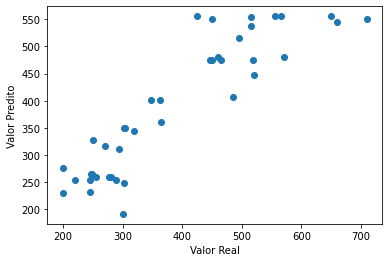

In [39]:
plt.scatter(Y_teste,y_teste_predito)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')

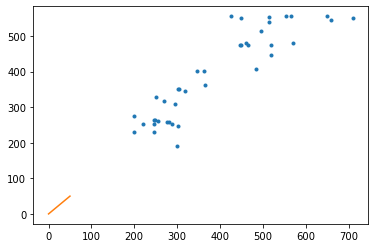

In [40]:
# plot prediction and actual data
y_teste_predito = lin_model.predict(X_teste)

plt.plot(Y_teste, y_teste_predito, '.')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 50, 100)
y = x
plt.plot(x, y)
plt.show()

In [41]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
import numpy as np

print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((y_teste_predito - Y_teste)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(Y_teste, y_teste_predito))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(Y_teste, y_teste_predito))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % np.sqrt(mean_squared_error(Y_teste, y_teste_predito)))
print("R2-score: %.2f" % r2_score(y_teste_predito , Y_teste) )

Soma dos Erros ao Quadrado (SSE): 144009 
Erro Quadrático Médio (MSE): 3600.23
Erro Médio Absoluto (MAE): 46.37
Raiz do Erro Quadrático Médio (RMSE): 60.00 
R2-score: 0.75


In [42]:
# Acurácia do modelo:
result = lin_model.score(X_treino, Y_treino)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 86.36%


In [43]:
# Acurácia do modelo:
result = lin_model.score(X_teste, Y_teste)
print("Accuracy: %.2f%%" % (result*100.0))


Accuracy: 81.02%


### Algoritmo 2

In [44]:
#Seu Código aqui...

#Random forest 

# importando a biblioteca
from sklearn.ensemble import RandomForestRegressor

# criando objeto do tipo randomforest regressão e calibrando 
regr2 = RandomForestRegressor(max_depth=3, random_state=50)
                             
# Treinando X e Y                         
regr2.fit(X_treino, Y_treino)


RandomForestRegressor(max_depth=3, random_state=50)

In [45]:
# Para obter as previsões, basta chamar o método predict()    #Testar o Classificador
y_teste_predito = regr2.predict(X_teste)
print("Predição usando regressão, retorna valores continuos: {}".format(y_teste_predito))

Predição usando regressão, retorna valores continuos: [239.46174155 526.19028828 214.95786135 226.81996002 239.46174155
 325.08862197 592.17469738 497.35035724 584.03969738 583.801687
 498.28982122 584.03969738 214.76286135 240.02357488 306.95477479
 584.03969738 322.04954749 321.51154749 431.37723269 426.08086905
 584.03969738 426.08086905 241.06892761 226.81996002 226.96089287
 322.44407316 240.02357488 503.34101536 326.19248849 226.81996002
 497.35035724 497.35035724 592.17469738 226.81996002 497.35035724
 497.35035724 326.19248849 226.10619934 526.19028828 497.35035724]


In [46]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
import numpy as np

print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((y_teste_predito - Y_teste)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(Y_teste, y_teste_predito))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(Y_teste, y_teste_predito))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % np.sqrt(mean_squared_error(Y_teste, y_teste_predito)))
print("R2-score: %.2f" % r2_score(y_teste_predito , Y_teste) )

Soma dos Erros ao Quadrado (SSE): 149628 
Erro Quadrático Médio (MSE): 3740.71
Erro Médio Absoluto (MAE): 48.34
Raiz do Erro Quadrático Médio (RMSE): 61.16 
R2-score: 0.81


In [47]:
# Acurácia do modelo:
result = regr2.score(X_treino, Y_treino)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 92.92%


In [48]:
# Acurácia do modelo:
result = regr2.score(X_teste, Y_teste)
print("Accuracy: %.2f%%" % (result*100.0))


Accuracy: 80.28%


Text(0, 0.5, 'Valor Predito')

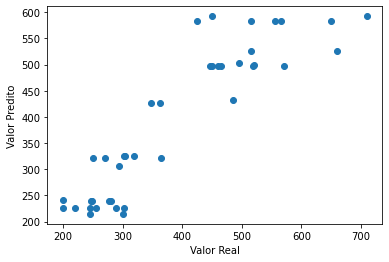

In [49]:
plt.scatter(Y_teste,y_teste_predito)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')

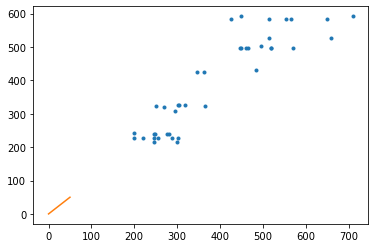

In [50]:
# plot prediction and actual data
y_teste_predito = regr2.predict(X_teste)

plt.plot(Y_teste, y_teste_predito, '.')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 50, 100)
y = x
plt.plot(x, y)
plt.show()

Sumarize na tabela abaixo os resultados obtidos para os conjuntos de dados de treino e de teste

**Resposta:**

|    | LinearRegression | RandomForest  |
|:---:|:---:|:---:|
| treino | 83.86% | 90.32% |
| teste  | 85.18% | 85.27% |

**Pergunta:** Qual dos algoritmos obteve um resultado melhor? Justifique

**Resposta:** O Algoritmo RandomForest, pois ele foi testando o "melhor caminho" possível com base nos conjuntos de dados passados.

## Modelo de produção: Teste com novos dados

Use seu modelo treinado para determinar: 

**`Quanto vale um apartamento de 65m2 com 2 quartos, 2 vagas, reformado no Centro?`**

In [51]:
#Criando uma lista com os valores desejados 
Prever_Valor_Apartamento =  ['65.2', 2, 2, 1]

In [52]:
#Passando os valores no dataset
df_Prever_Valor_Apartamento = pd.DataFrame([Prever_Valor_Apartamento] , columns = (['metros', 'quartos', 'vagas','reformado']))

In [53]:
#Criando nosso X_treino
X_df_Prever_Valor_Apartamento = df_Prever_Valor_Apartamento[['metros', 'reformado']]

In [56]:
#Implementando modelo de regressão na nova base de dados
y_teste_predito_novo = lin_model.predict(X_df_Prever_Valor_Apartamento)
print("Predição usando regressão, retorna valores continuos: {}".format(y_teste_predito_novo))

Predição usando regressão, retorna valores continuos: [317.75822195]


O valor predito é de 317.758

## 5. Conclusões finais

Ufa!!... Chegamos ao final. Parabéns! De forma simplificada e completa, passamos por todas as etapas de um projeto de aprendizado de maquina. Outras etapas podem ser adicionadas no tratamento dos dados e desenvolvimento do modelo.


**Pergunta:**: O modelo desenvolvido obteve um resultado satisfatório? Justifique:

**Resposta**: Sim, pois a acurácia do modelo é alta o suficiente para conseguir prever possíveis valores

**Pergunta:**: O que faria diferente para melhorar resultado obtido? Justifique:

**Resposta**: Poderiamos, aumentar nossa base de treino (x_treino) para que o algotítmo calibre melhor o seu resultado, uma outra possível solução, seria aumentar o número de teste do nosso modelo.




